In [1]:
#Load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# The line graphs for accuracy 

In [2]:
#the accuracy lists C1 are the balanced accuracies and E1 are the stand. deviation.
# block, 1,10,20,35

C1 = np.array([0.69, 0.60, 0.62, 0.50])
E1 = np.array([0.15, 0.16, 0.15, 0.0])

C2 = np.array([0.64, 0.68, 0.53, 0.54])
E2 = np.array([0.21,  0.22, 0.10, 0.15])

C3 = np.array([0.70, 0.52, 0.63, 0.5])
E3 = np.array([0.18, 0.17, 0.18, 0.17])

C4 = np.array([0.51, 0.38, 0.36, 0.38])
E4 = np.array([0.11, 0.12, 0.13, 0.13])

C5 = np.array([0.48, 0.38,  0.33, 0.33])
E5 = np.array([0.14, 0.11, 0.0, 0.0])

C6 = np.array([0.24, 0.23, 0.17, 0.18])
E6 = np.array([0.09, 0.10, 0.06, 0.06])

x = np.array([1, 10, 20, 30])
problem_list = [C1, C2, C3, C4, C5, C6]
std_list = [E1, E2, E3, E4, E5, E6]

In [3]:

m_list = []
b_list = []
reg_lines = []
for i in range(6):
    m, b = np.polyfit(x, problem_list[i], 1)
    m_list.append(m) #saving m
    b_list.append(b) #saving b
    reg_line =  [(m*x)+b for x in x]
    reg_lines.append(reg_line)
    
print(m_list)
print(b_list)

[-0.005655868295273498, -0.004689325544344135, -0.004965480616038241, -0.004137015400955927, -0.0050982474774296386, -0.0024747742963356347]
[0.6887519915029204, 0.6690122145512478, 0.6632235793945831, 0.47058948486457786, 0.4577482740308018, 0.24274030801911836]


In [4]:
problem_labels = [ r"$C_{\mathrm{EC}}^{group}[1]$",  r"$C_{\mathrm{EC}}^{group}[2]$",  r"$C_{\mathrm{EC}}^{group}[3]$",  r"$C_{\mathrm{EC}}^{group}[4]$",  r"$C_{\mathrm{EC}}^{group}[5]$",  r"$C_{\mathrm{EC}}^{group}[6]$"]

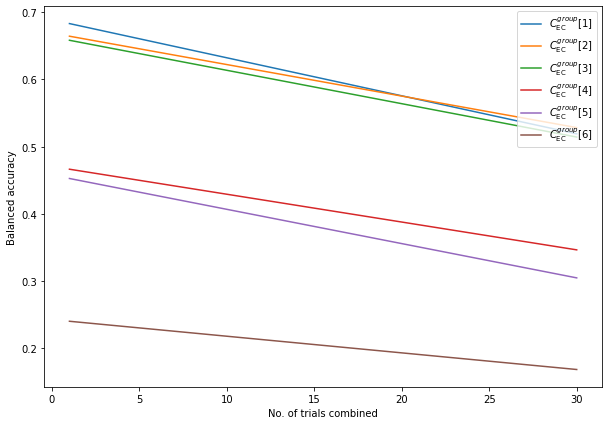

In [5]:

from matplotlib.pyplot import figure
figure(figsize=(10, 7))
for i in range(6):
    plt.plot(x, reg_lines[i] , label = problem_labels[i])
    plt.legend(loc=1)

# Add title and axis names
plt.xlabel('No. of trials combined')
plt.ylabel('Balanced accuracy')    

plt.savefig('balanced accuracy resolution.pdf')
plt.show()

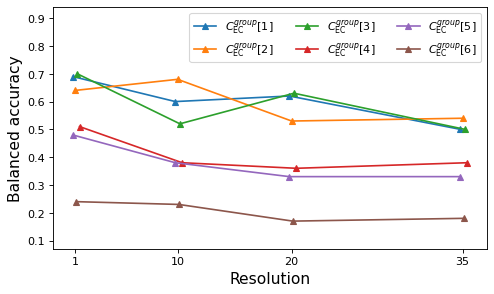

In [6]:
#Setting the x axis
x1 = np.array([0.8, 9.8, 19.8, 34.8])
x2 = np.array([1, 10, 20, 35])
x3 = np.array([1.2, 10.2, 20.2, 35.2])
x4 = np.array([1.4, 10.4, 20.4, 35.4])
x5 = np.array([1.3, 10.3, 20.3, 35.3])
x6 = np.array([1.1, 10.1, 20.1, 35.1])

x_list = [x1,x2, x3, x4,  x1, x6]

from matplotlib.pyplot import figure
figure(figsize=(7, 4), dpi=80)
for i in range(6):
    plt.errorbar(x_list[i], problem_list[i], std_list[i] , label = problem_labels[i], marker='^', ecolor= 'White')
    plt.legend(loc=1, ncol= 3)

# Add title and axis names
plt.xlabel('Resolution', fontsize=14)
plt.ylabel('Balanced accuracy', fontsize=14)
plt.xticks(ticks=[1,10,20,35])

plt.savefig('balanced accuracy with std.pdf')
plt.show()

In [7]:
m_list

[-0.005655868295273498,
 -0.004689325544344135,
 -0.004965480616038241,
 -0.004137015400955927,
 -0.0050982474774296386,
 -0.0024747742963356347]

In [8]:
b_list

[0.6887519915029204,
 0.6690122145512478,
 0.6632235793945831,
 0.47058948486457786,
 0.4577482740308018,
 0.24274030801911836]

# Colored matrices to indicate the key features

In [9]:
#function to spit out all the relevent trials that needs to be colored when resolution is changed
#n is the number of trials combined in the new resolution
# x is the trial number in the new resolution that needs to be mapped for the 140
def get_trial_numbers_for_resolution(n, x): 
    end_trial = (n*(x+1))-1
    begin_trial = end_trial - (n-1)
    color_list = np.arange(begin_trial, end_trial + 1)#+1 is for arange
    return color_list

In [10]:
#function to get the right feature lists for problems for drawing purposes

def get_feature_lists_for_plots( x_list, features_for_problem, trial_feature, h ):
    for c in range(6):    
        for i in range(len(features_for_problem[c])):
            for j in range(len(trial_feature[c][i])):
                color_list = get_trial_numbers_for_resolution(h, trial_feature[c][i][j])
                for k in range(len(color_list)):
                    x_list[c][features_for_problem[c][i]][color_list[k]] = 7 #coloring the features
    return  x_list

# Plotting the features on top of each other for the four resolutions

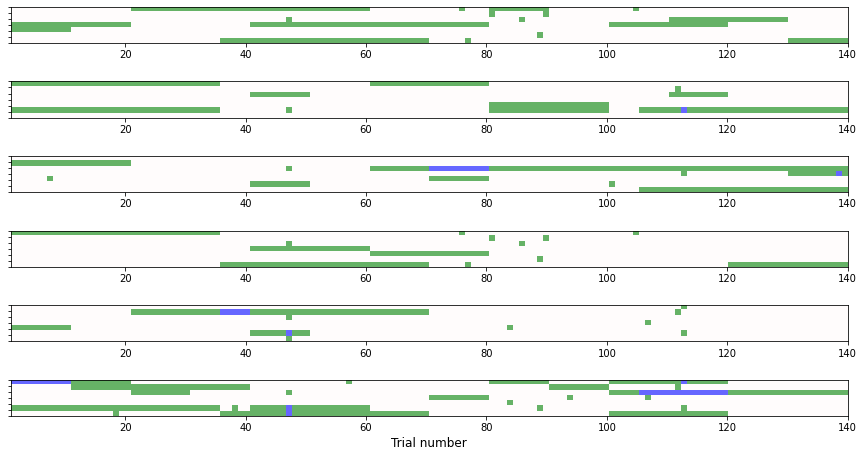

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
h1 = 1 #number of blocks combined
h2 = 10
h3 = 20
h4 = 35


x_11 = [[15]*140 for i in range(7)]
x_12 = [[15]*140 for i in range(7)]
x_13 = [[15]*140 for i in range(7)]
x_14 = [[15]*140 for i in range(7)]
x_15 = [[15]*140 for i in range(7)]
x_16 = [[15]*140 for i in range(7)]

x_21 = [[15]*140 for i in range(7)]
x_22 = [[15]*140 for i in range(7)]
x_23 = [[15]*140 for i in range(7)]
x_24 = [[15]*140 for i in range(7)]
x_25 = [[15]*140 for i in range(7)]
x_26 = [[15]*140 for i in range(7)]

x_31 = [[15]*140 for i in range(7)]
x_32 = [[15]*140 for i in range(7)]
x_33 = [[15]*140 for i in range(7)]
x_34 = [[15]*140 for i in range(7)]
x_35 = [[15]*140 for i in range(7)]
x_36 = [[15]*140 for i in range(7)]

x_41 = [[15]*140 for i in range(7)]
x_42 = [[15]*140 for i in range(7)]
x_43 = [[15]*140 for i in range(7)]
x_44 = [[15]*140 for i in range(7)]
x_45 = [[15]*140 for i in range(7)]
x_46 = [[15]*140 for i in range(7)]


x1_list = [x_11, x_12, x_13, x_14, x_15, x_16]
x2_list = [x_21, x_22, x_23, x_24, x_25, x_26]
x3_list = [x_31, x_32, x_33, x_34, x_35, x_36]
x4_list = [x_41, x_42, x_43, x_44, x_45, x_46]


#these are the features (out of 7) that matters to the problem
features_for_problem1 = [[0,1,2,5,6], 
                        [1,5],
                        [2,3,4,5],
                        [0,1,2,5,6],
                        [0,1,2,3,4,5,6],
                        [0,1,2,3,4,5,6]]


features_for_problem2 = [[0,2,4,6], 
                        [2],
                        [3,4,5],
                        [6],
                        [4,5], 
                        [0,1,2,3,5] ]



features_for_problem3 = [[0,3], 
                        [0,4,5],
                        [1,2],
                        [3,4], 
                        [1], 
                        [0,1,2,6] ]




features_for_problem4 = [[6], 
                        [0,5],
                        [2,6],
                        [0,6],
                        [1], 
                        [2,5,6] ]

                        
#these should be one less the actual trial number
trial_feature1 = [[[104,75], [89,80], [85,46], [88], [76]],
                 [[111], [46, 112]],
                 [[46], [112,138], [6], [100]],
                 [[104,75], [89,80], [85, 46], [88], [76]],
                 [[112], [111], [46], [106],  [83], [46,112], [46]],
                 [[112, 56], [111], [46],[106, 93], [83], [46,112,88,37], [46,17] ]]


#These should be one less the actual trial number
trial_feature2 = [[[8], [12,11], [0], [13]],
                 [[4,11]],
                 [[13], [7], [4]],
                 [[13,12]],
                 [[0], [4]],
                 [[8,0], [1,9],[2], [7], [4,5] ]]


trial_feature3 = [[[2,1], [2,3,5,0]],
                 [[3], [4], [4]],
                 [[0], [3]],
                 [[2], [3]],
                 [[1]],
                 [[5,0], [1], [5], [5]]]


trial_feature4 = [[[1]],
                 [[0], [3,0]],
                 [[3,2], [3]],
                 [[0], [1]],
                 [[1]],
                 [[3], [0], [1]]]



x1_list = get_feature_lists_for_plots( x1_list, features_for_problem1, trial_feature1, h1 )
x2_list = get_feature_lists_for_plots( x2_list, features_for_problem2, trial_feature2, h2 )
x3_list = get_feature_lists_for_plots( x3_list, features_for_problem3, trial_feature3, h3 )
x4_list = get_feature_lists_for_plots( x4_list, features_for_problem4, trial_feature4, h4 )


[m,n] = np.shape(x1_list[0]) #they are all same shape so no issue by taking the first one
import itertools
from operator import add


problem_list = []
#get one list for each problem:
for i in range(6):
    problem = []
    concat_problem = []
    problem.append(x1_list[i])#this has length 7
    problem.append(x2_list[i])
    problem.append(x3_list[i])
    problem.append(x4_list[i])
    #Now add the values of the 4 lists with 7 sublists individually. That is add the sublists seperately.
    for k in range(7):
        concat_problem.append(list(map(sum, zip(problem[0][k], problem[1][k], problem[2][k], problem[3][k]))))
    problem_list.append(concat_problem)


from matplotlib import colors      
    
#Colour Map using Matrix
fig, axs = plt.subplots(nrows = 6, figsize=(15, 8))
#f, (ax1, ax2) = plt.subplots(nrows=2)
#plt.imshow(x, alpha=0.5, cmap='inferno')

#cmap_list = ['YlGn_r', 'YlGn_r', 'YlGn_r', 'YlGn_r', 'YlGn_r', 'YlGn_r']
cmap_list = [colors.ListedColormap(['green', 'snow']), colors.ListedColormap(['blue','green','snow']),
             colors.ListedColormap(['blue', 'green', 'snow']), colors.ListedColormap(['green', 'snow']),
             colors.ListedColormap(['blue' ,'green','snow']), colors.ListedColormap(['blue','green', 'snow'])]
for i in range(6):
    
    axs[i].imshow(problem_list[i], alpha=0.6, cmap= cmap_list[i], extent=[1, 140,6, 0])
    axs[i].set_yticks(np.arange(m))
    axs[i].set_yticklabels([]) #(np.arange(m), rotation=0 , fontsize=0)
  
    

#fig.tight_layout() 
#plt.legend()#loc="upper left")
plt.xlabel("Trial number", fontsize=12)
plt.savefig('Resolution and features final.pdf')
plt.show()